# Luke Muoio & Will Kang's Presentation on WHOOP and Recovery

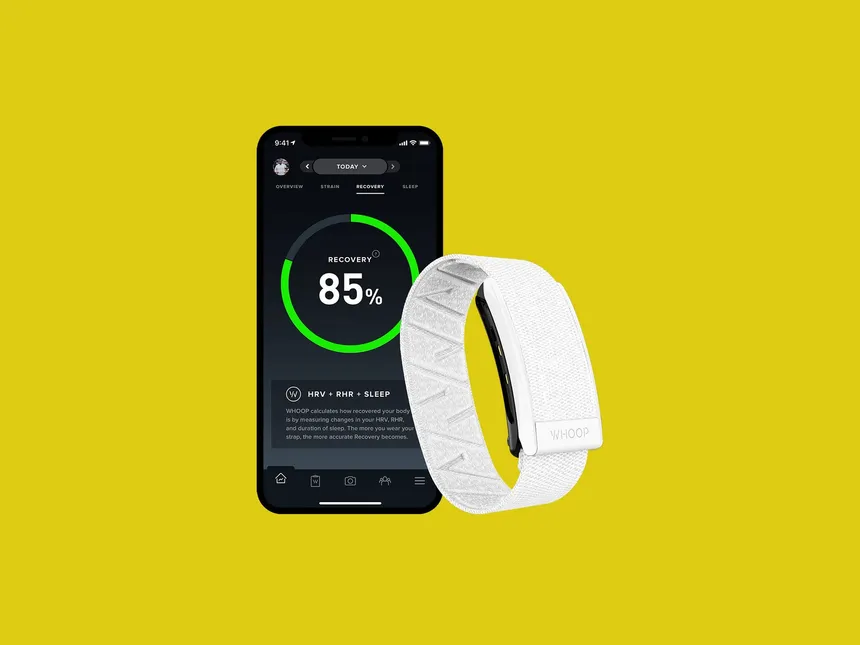

# What is a WHOOP?
The Whoop tracker is designed to monitor various aspects of an individual's physiological data to provide insights into their fitness, recovery, and overall well-being.

**Strain Tracking:** Measures the physical strain on the body during activities, providing insights into the intensity and impact of workouts.

**Recovery Monitoring:** Analyzes factors such as heart rate variability and sleep quality to assess how well the body is recovering from physical exertion.

**Sleep Tracking:** Monitors sleep duration, efficiency, and other sleep metrics to help users optimize their sleep patterns.

**Heart Rate Monitoring:** Tracks continuous heart rate data during various activities and at rest.

Athletes and fitness enthusiasts commonly use devices like the Whoop tracker to fine-tune their training routines, optimize recovery, and enhance overall performance. Keep in mind that product features may evolve, so it's advisable to refer to the latest information from Whoop for the most accurate details.







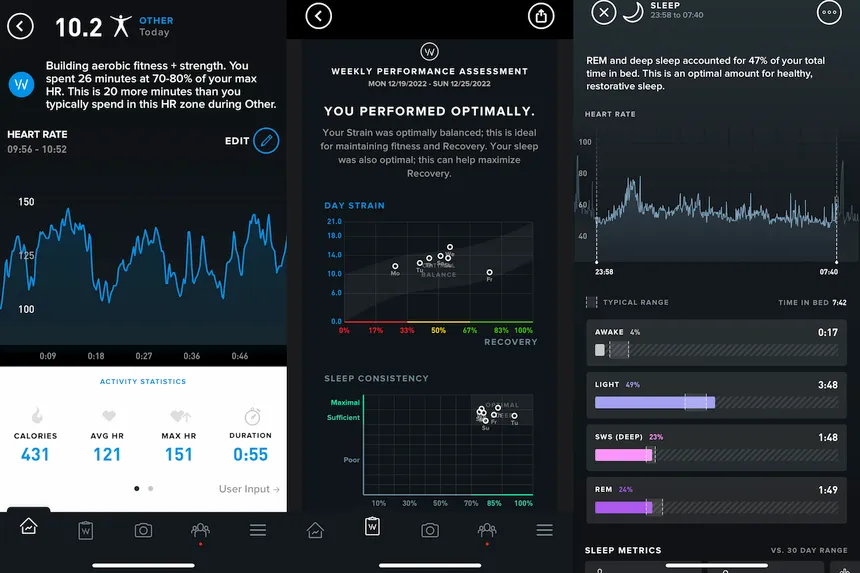

# How we created our WHOOP Dataset
All of our WHOOP data came directly from myself (Luke), as well as my friends and family. WHOOP allows users to export their data in order to analyze themselves or send to a healthcare professional. We then decided which

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/') # attach the file to google drive

whoop_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/AMWHOOPDATA.csv") # create a dataframe of the whoop CSV we assembled

Mounted at /content/drive/


In [ ]:
whoop_df # shows us the dataframe

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Sleep consistency %
0,10/22/23 4:34,NaN,UTC-04:00,19.0,77.0,38.0,33.30,97.00,NaN,NaN,...,469.0,521.0,149.0,135.0,185.0,52.0,597.0,78.0,89.0,62.0
1,10/21/23 4:09,10/22/23 4:34,UTC-04:00,10.0,83.0,32.0,33.43,97.18,15.8,3343.0,...,346.0,466.0,177.0,100.0,69.0,120.0,503.0,0.0,74.0,61.0
2,10/20/23 1:24,10/21/23 4:09,UTC-04:00,58.0,62.0,97.0,32.53,97.56,13.4,2995.0,...,602.0,686.0,247.0,146.0,209.0,84.0,519.0,30.0,87.0,74.0
3,10/19/23 2:09,10/20/23 1:24,UTC-04:00,53.0,64.0,95.0,32.89,97.50,10.2,2335.0,...,445.0,510.0,230.0,118.0,97.0,65.0,493.0,10.0,87.0,81.0
4,10/18/23 1:06,10/19/23 2:09,UTC-04:00,72.0,58.0,121.0,33.10,98.00,7.5,2312.0,...,552.0,638.0,182.0,128.0,242.0,86.0,568.0,73.0,86.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161,2/8/21 22:20,2/9/21 22:20,UTC-08:00,67.0,64.0,37.0,NaN,NaN,9.5,1846.0,...,478.0,540.0,261.0,137.0,80.0,62.0,490.0,22.0,90.0,82.0
4162,2/7/21 22:34,2/8/21 22:20,UTC-08:00,60.0,62.0,35.0,NaN,NaN,11.7,1993.0,...,431.0,475.0,298.0,95.0,38.0,44.0,477.0,0.0,91.0,82.0
4163,2/6/21 20:40,2/7/21 22:34,UTC-08:00,48.0,64.0,30.0,NaN,NaN,13.5,2429.0,...,540.0,605.0,353.0,121.0,66.0,65.0,484.0,2.0,89.0,83.0
4164,2/5/21 21:35,2/6/21 20:40,UTC-08:00,53.0,66.0,32.0,NaN,NaN,14.1,2478.0,...,490.0,557.0,312.0,112.0,66.0,67.0,494.0,31.0,89.0,84.0


In [ ]:
whoop_df.columns # Checking the column names in the data frame

Index(['Cycle start time', 'Cycle end time', 'Cycle timezone',
       'Recovery score %', 'Resting heart rate (bpm)',
       'Heart rate variability (ms)', 'Skin temp (celsius)', 'Blood oxygen %',
       'Day Strain', 'Energy burned (cal)', 'Max HR (bpm)', 'Average HR (bpm)',
       'Sleep onset', 'Wake onset', 'Sleep performance %',
       'Respiratory rate (rpm)', 'Asleep duration (min)',
       'In bed duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)',
       'Sleep efficiency %', 'Sleep consistency %'],
      dtype='object')

In [ ]:
print(whoop_df.dtypes) # check the data types in the dataframe

Cycle start time                object
Cycle end time                  object
Cycle timezone                  object
Recovery score %               float64
Resting heart rate (bpm)       float64
Heart rate variability (ms)    float64
Skin temp (celsius)            float64
Blood oxygen %                 float64
Day Strain                     float64
Energy burned (cal)            float64
Max HR (bpm)                   float64
Average HR (bpm)               float64
Sleep onset                     object
Wake onset                      object
Sleep performance %            float64
Respiratory rate (rpm)         float64
Asleep duration (min)          float64
In bed duration (min)          float64
Light sleep duration (min)     float64
Deep (SWS) duration (min)      float64
REM duration (min)             float64
Awake duration (min)           float64
Sleep need (min)               float64
Sleep debt (min)               float64
Sleep efficiency %             float64
Sleep consistency %      

In [ ]:
nan_check = whoop_df.isna() # Check for NaN values
# Count the number of NaN values in each column
nan_count_per_column = nan_check.sum()

# Print the result
print(nan_count_per_column)
whoop_df.info()

Cycle start time                  1
Cycle end time                    5
Cycle timezone                    1
Recovery score %                 57
Resting heart rate (bpm)         57
Heart rate variability (ms)      57
Skin temp (celsius)            1570
Blood oxygen %                 1562
Day Strain                       20
Energy burned (cal)               5
Max HR (bpm)                      5
Average HR (bpm)                  5
Sleep onset                      57
Wake onset                       57
Sleep performance %              57
Respiratory rate (rpm)           57
Asleep duration (min)            57
In bed duration (min)            57
Light sleep duration (min)       57
Deep (SWS) duration (min)        57
REM duration (min)               57
Awake duration (min)             57
Sleep need (min)                 57
Sleep debt (min)                 57
Sleep efficiency %               57
Sleep consistency %              94
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4

## Checking for NA values then interpolating them with a linear pattern so that the data has no missing values.

In [ ]:
columns_to_interpolate = ['Recovery score %', 'Resting heart rate (bpm)',
       'Heart rate variability (ms)', 'Skin temp (celsius)', 'Blood oxygen %',
       'Day Strain', 'Energy burned (cal)', 'Max HR (bpm)', 'Average HR (bpm)',
       'Sleep performance %',
       'Respiratory rate (rpm)', 'Asleep duration (min)',
       'In bed duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)',
       'Sleep efficiency %', 'Sleep consistency %',]
whoop_df[columns_to_interpolate] = whoop_df[columns_to_interpolate].interpolate(method='linear')
nan_check = whoop_df.isna() # Check for NaN values
# Count the number of NaN values in each column
nan_count_per_column = nan_check.sum()

# Print the result
print(nan_count_per_column)

Cycle start time                1
Cycle end time                  5
Cycle timezone                  1
Recovery score %                0
Resting heart rate (bpm)        0
Heart rate variability (ms)     0
Skin temp (celsius)             0
Blood oxygen %                  0
Day Strain                      1
Energy burned (cal)             1
Max HR (bpm)                    1
Average HR (bpm)                1
Sleep onset                    57
Wake onset                     57
Sleep performance %             0
Respiratory rate (rpm)          0
Asleep duration (min)           0
In bed duration (min)           0
Light sleep duration (min)      0
Deep (SWS) duration (min)       0
REM duration (min)              0
Awake duration (min)            0
Sleep need (min)                0
Sleep debt (min)                0
Sleep efficiency %              0
Sleep consistency %             0
dtype: int64


# Which health statistics have the greatest positive correlation according to our data? (Correlation Matrix)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = whoop_df.corr()

# Identify pairs of variables with positive correlation
positively_correlated_pairs = []

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and correlation_matrix.loc[col1, col2] > 0:
            positively_correlated_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))

# Sort the positively correlated pairs based on the correlation coefficient in descending order
sorted_positively_correlated_pairs = sorted(positively_correlated_pairs, key=lambda x: x[2], reverse=True)

# Display the sorted positively correlated pairs
for pair in sorted_positively_correlated_pairs[:50:2]:
    print(f"Positive correlation between {pair[0]} and {pair[1]}: {pair[2]}")

Positive correlation between Asleep duration (min) and In bed duration (min): 0.9233739896834878
Positive correlation between Sleep performance % and Asleep duration (min): 0.8477916144056613
Positive correlation between Day Strain and Energy burned (cal): 0.7968765634242674
Positive correlation between Asleep duration (min) and Light sleep duration (min): 0.7950581708800172
Positive correlation between Sleep need (min) and Sleep debt (min): 0.7899302859216625
Positive correlation between Day Strain and Max HR (bpm): 0.7807423243714645
Positive correlation between Sleep performance % and In bed duration (min): 0.7419352352421776
Positive correlation between In bed duration (min) and Light sleep duration (min): 0.7187029510868896
Positive correlation between Sleep performance % and Light sleep duration (min): 0.7137586626406232
Positive correlation between Asleep duration (min) and Deep (SWS) duration (min): 0.6435801922613423
Positive correlation between Day Strain and Average HR (bpm)

<ipython-input-8-7ab96d0226e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = whoop_df.corr()


# Which health statistics have the greatest negative correlation according to our data? (Correlation Matrix)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = whoop_df.corr()

# Identify pairs of variables with negative correlation
negatively_correlated_pairs = []

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and correlation_matrix.loc[col1, col2] < 0:
            negatively_correlated_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))

# Sort the negatively correlated pairs based on the correlation coefficient in descending order
sorted_negatively_correlated_pairs = sorted(negatively_correlated_pairs, key=lambda x: x[2], reverse=False)

# Display the sorted negatively correlated pairs
for pair in sorted_negatively_correlated_pairs[:50:2]: # Since we have pairs of the same correlation values, we are
    print(f"Negative correlation between {pair[0]} and {pair[1]}: {pair[2]}")

Negative correlation between Awake duration (min) and Sleep efficiency %: -0.90637032393578
Negative correlation between Resting heart rate (bpm) and Heart rate variability (ms): -0.7556510740570261
Negative correlation between Recovery score % and Resting heart rate (bpm): -0.605281659652367
Negative correlation between Sleep performance % and Sleep need (min): -0.5887387824639578
Negative correlation between Sleep performance % and Sleep debt (min): -0.49539217839258615
Negative correlation between Sleep performance % and Respiratory rate (rpm): -0.4507965090623724
Negative correlation between Heart rate variability (ms) and Skin temp (celsius): -0.41289907612362015
Negative correlation between Light sleep duration (min) and REM duration (min): -0.3627826572140074
Negative correlation between Resting heart rate (bpm) and Respiratory rate (rpm): -0.35331838428708146
Negative correlation between Respiratory rate (rpm) and Deep (SWS) duration (min): -0.34724423562259504
Negative correla

<ipython-input-9-519e13b24744>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = whoop_df.corr()


# Plotting Miniature Visualizations of Statistical Distributions in all WHOOP Tracking Categories

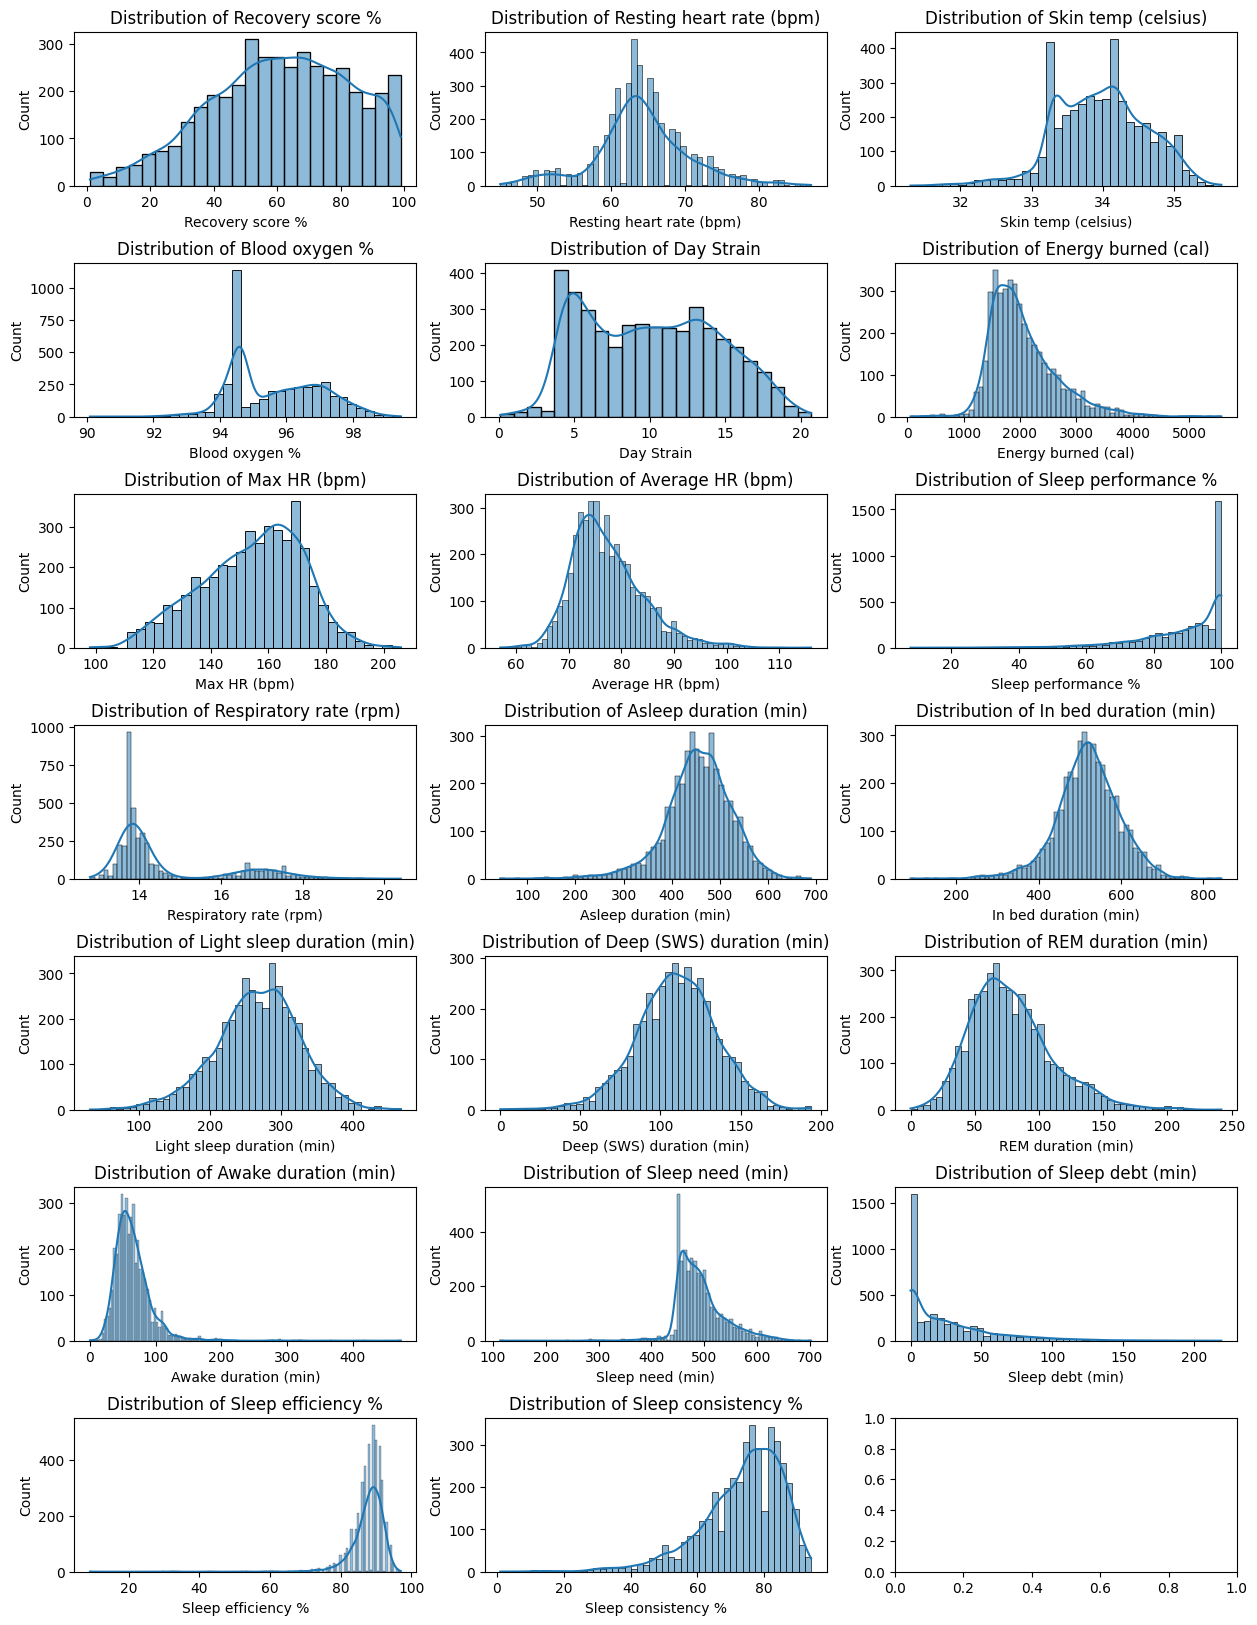

In [ ]:
# Columns to analyze
columns_to_analyze = ['Recovery score %', 'Resting heart rate (bpm)', 'Skin temp (celsius)', 'Blood oxygen %', 'Day Strain', 'Energy burned (cal)',
                       'Max HR (bpm)', 'Average HR (bpm)', 'Sleep performance %', 'Respiratory rate (rpm)', 'Asleep duration (min)',
                       'In bed duration (min)', 'Light sleep duration (min)', 'Deep (SWS) duration (min)', 'REM duration (min)',
                       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)', 'Sleep efficiency %', 'Sleep consistency %']

# Create subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Plot histograms for each column
for i, column in enumerate(columns_to_analyze): # enumerate boss so boss luke look at this its so boss
    if column in whoop_df.columns:
        sns.histplot(whoop_df[column].dropna(), kde=True, ax=axes[i // 3, i % 3])
        axes[i // 3, i % 3].set_title(f'Distribution of {column}')
    else:
        print(f"Column '{column}' not found in the dataframe.")

# Show the plot
plt.show()


# Analysis of Time Spent in Light Sleep vs Overall Time Spent Sleeping




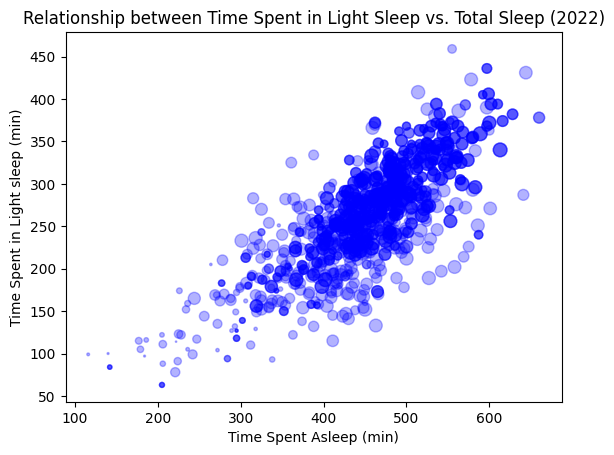

In [ ]:
whoop_df['Cycle start time'] = pd.to_datetime(whoop_df['Cycle start time'])
whoop_2023 = whoop_df[(whoop_df['Cycle start time'].dt.year == 2022)]

plt.scatter(whoop_2023['Asleep duration (min)'],whoop_2023['Light sleep duration (min)'], s=whoop_2023['Recovery score %'], alpha=0.3, c='blue', label='Bubble Chart')

# Add labels and title
plt.xlabel('Time Spent Asleep (min)')
plt.ylabel('Time Spent in Light sleep (min)')
plt.title('Relationship between Time Spent in Light Sleep vs. Total Sleep (2022)')


# Show the plot
plt.show()


## This scatter plot of the Analysis of Time Spent in Light Sleep vs Overall Time Spent Sleeping shows us that there is a clear linear relationship between time spent asleep and light sleep and we found that with more sleep the most significant increase of the three types of sleep were light sleep compared


# How does Heart rate variability effect recovery score


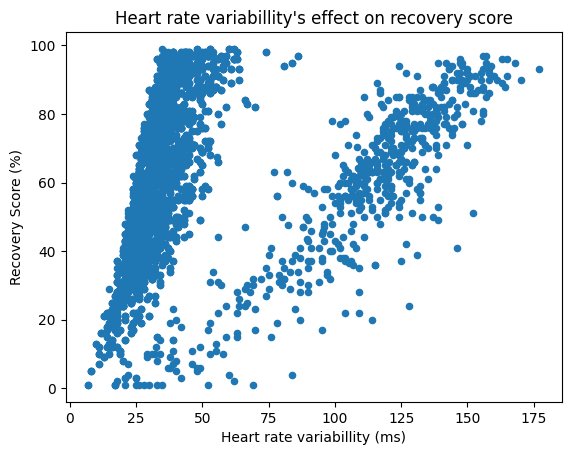

In [ ]:
whoop_df.plot(x='Heart Rate variability (ms)', y='Recovery score %', kind='scatter')
plt.title('Heart rate variabillity\'s effect on recovery score')
plt.xlabel('Heart rate variabillity (ms)')
plt.ylabel('Recovery Score (%)')
plt.show()

## This scatter plot is best understood when you consider that heart rate variability is different for each person. One person can have an HRV of 70 and that shows that they were well rested while others an HRV of 70 is quite low. This is shown by the bimodal lines of correlation.

# Relationship Between Energy Burned and Average Heart Rate

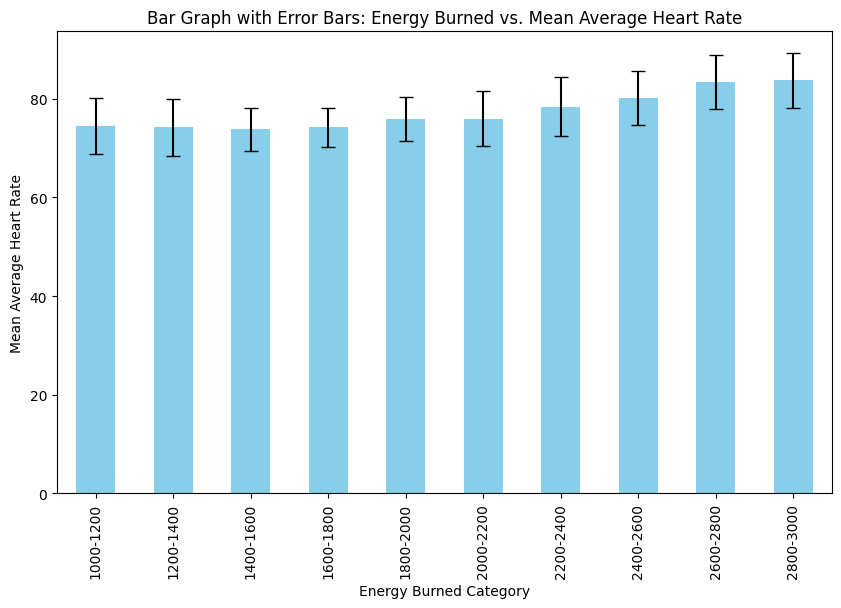

In [ ]:

# Binning 'Energy burned' with extended categories
bins = np.arange(1000, 3200, 200)
labels = [f'{i}-{i+200}' for i in range(1000, 3000, 200)]

whoop_df['Energy burned category'] = pd.cut(whoop_df['Energy burned (cal)'], bins=bins, labels=labels)

# Create a bar graph with error bars
plt.figure(figsize=(10, 6))
bar_data = whoop_df.groupby('Energy burned category')['Average HR (bpm)'].agg(['mean', 'std'])
bar_data['mean'].plot(kind='bar', yerr=bar_data['std'], capsize=5, color='skyblue')

plt.title('Bar Graph with Error Bars: Energy Burned vs. Mean Average Heart Rate')
plt.xlabel('Energy Burned Category')
plt.ylabel('Mean Average Heart Rate')
plt.show()

# Analysis on Daily Strain based on Days of the Week

<ipython-input-101-58fc7d57e616>:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Day of Week', y='Day Strain', data=whoop_df, palette='viridis', order=days_order)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


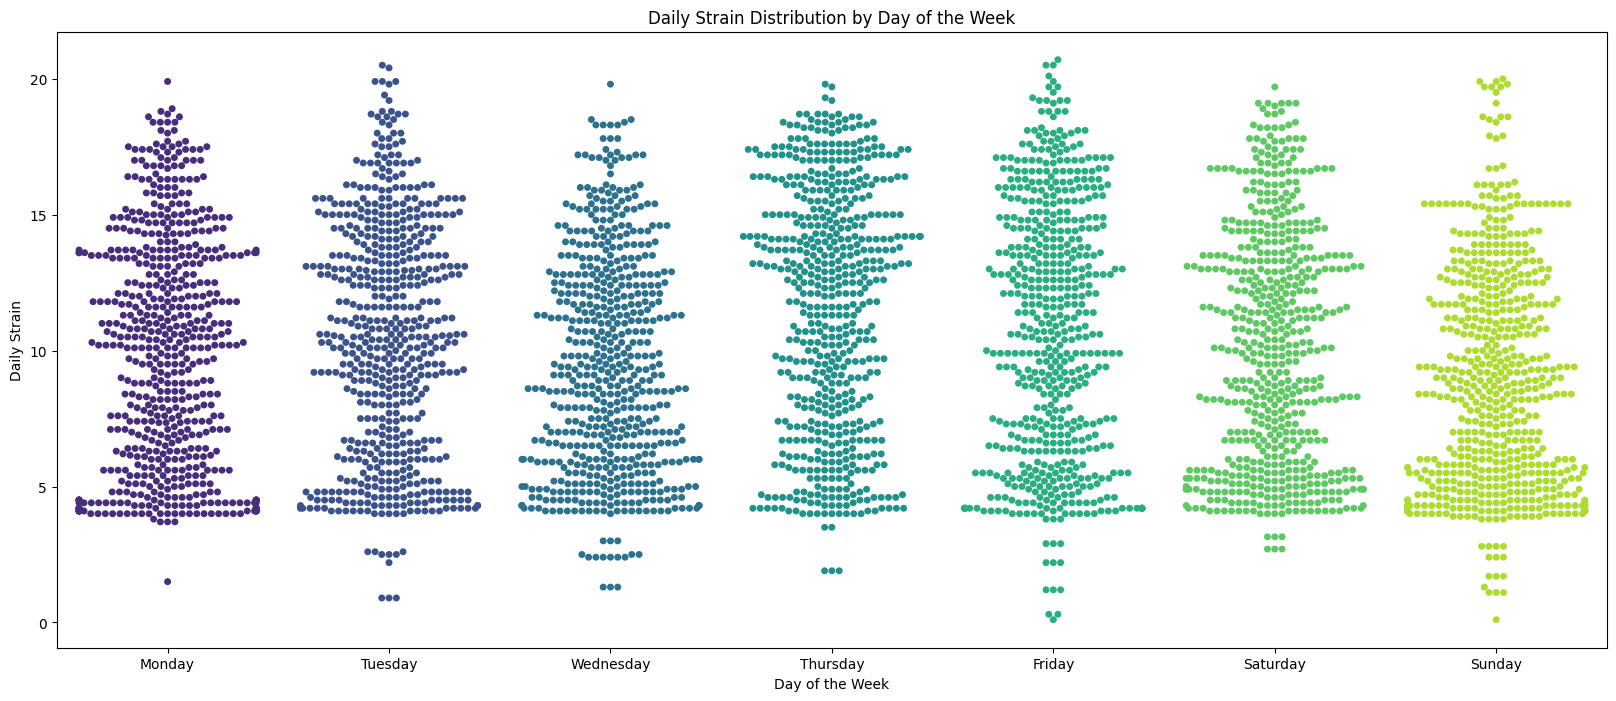

In [ ]:
# Assuming your DataFrame is named 'whoop_df'
# Assuming 'Cycle start time' is in datetime format
whoop_df['Cycle start time'] = pd.to_datetime(whoop_df['Cycle start time'])

# Extract day of the week from 'Cycle start time'
whoop_df['Day of Week'] = whoop_df['Cycle start time'].dt.day_name()

# Define the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a swarm plot with custom order
plt.figure(figsize=(20, 8))
sns.swarmplot(x='Day of Week', y='Day Strain', data=whoop_df, palette='viridis', order=days_order)
plt.title('Daily Strain Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Daily Strain')
plt.show()

## This swarm plot illustrates strain distribution throughout the days. The strain distribution is about even throughout the days with a small increase in very high strain on Thursdays and Fridays. There is a dip in strain on the weekends which could make sense because these are frequently days of rest.

# How to Have the Worst Day Ever
For Context: A Strain Score of 21.0 means you are basically running a 40-yard dash all day.

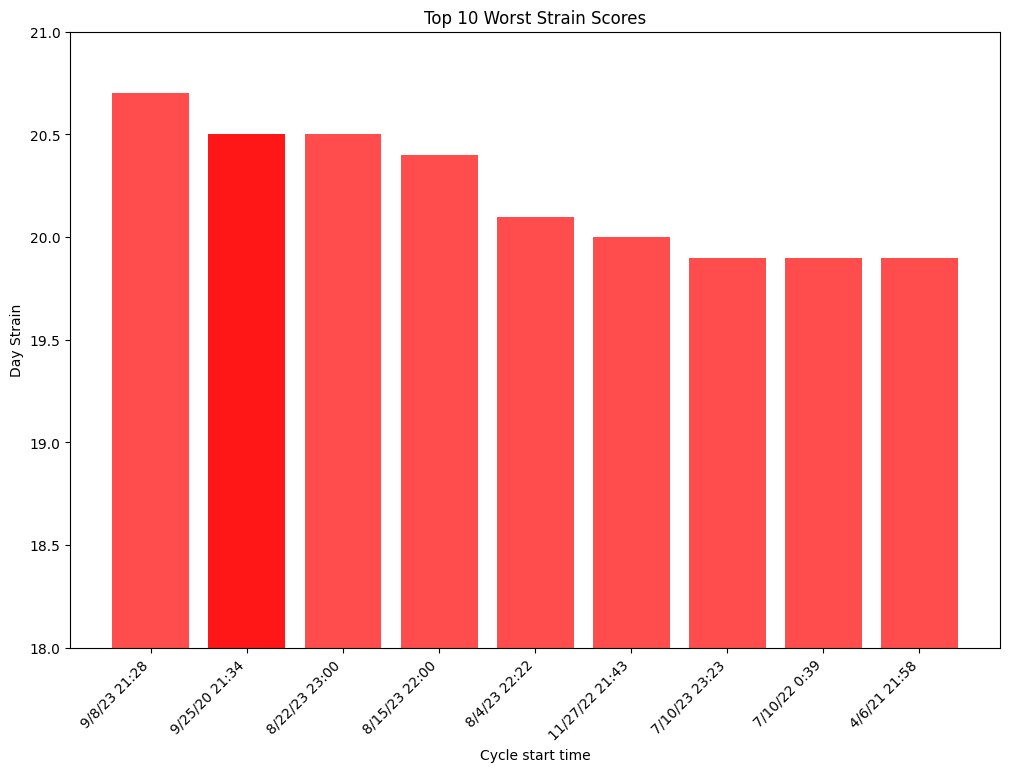

In [ ]:
# Identify the top 10 worst strain scores
top_10_worst_strain = whoop_df.nlargest(10, 'Day Strain')

# Plot the top 10 worst strain scores
plt.figure(figsize=(12, 8))
plt.bar(top_10_worst_strain['Cycle start time'], top_10_worst_strain['Day Strain'], color='red', alpha=0.7)

# Set the y-axis limits
plt.ylim(18, 21)

plt.title('Top 10 Worst Strain Scores')
plt.xlabel('Cycle start time')
plt.ylabel('Day Strain')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## This graph highlights the highest strain days of the year. A strain score of 21 is impossible so it is surprising to see so many scores around 20. A day with this high of strain means that for a majority of the day the user’s heart rate was in very high heart rate zones


# Analysis of Factors & Correlations with REM Sleep Duration

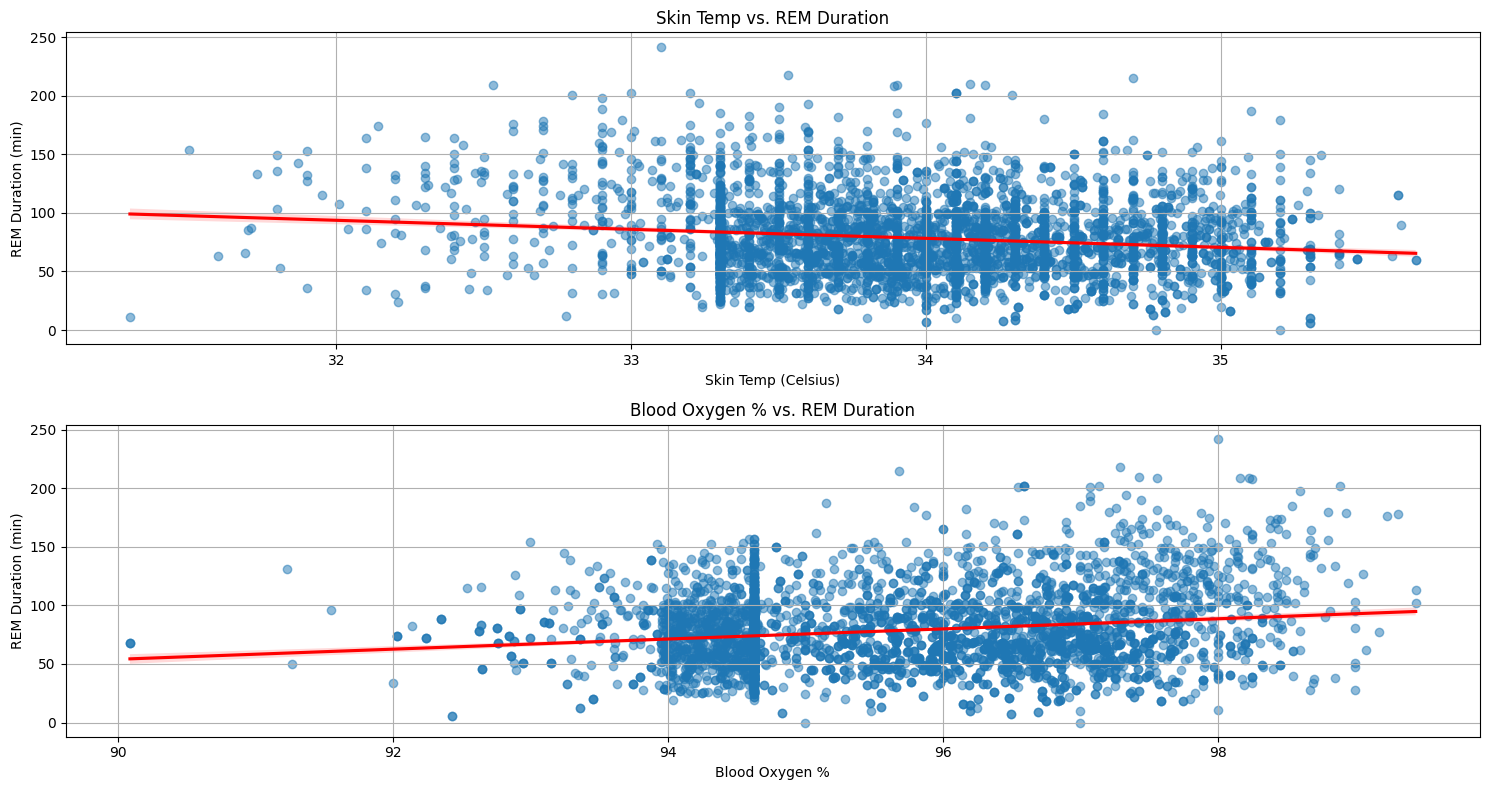

In [ ]:
# Assuming 'Skin temp (celsius)', 'Blood oxygen %', and 'REM duration (min)' columns exist in whoop_df
whoop_df['Skin temp (celsius)'] = pd.to_numeric(whoop_df['Skin temp (celsius)'], errors='coerce')
whoop_df['Blood oxygen %'] = pd.to_numeric(whoop_df['Blood oxygen %'], errors='coerce')
whoop_df['REM duration (min)'] = pd.to_numeric(whoop_df['REM duration (min)'], errors='coerce')

# Drop rows with NaN values in the specified columns
whoop_df = whoop_df.dropna(subset=['Skin temp (celsius)', 'Blood oxygen %', 'REM duration (min)'])

# Create scatter plots with red regression lines
plt.figure(figsize=(15, 8))

# Scatter plot for 'Skin temp (celsius)' vs. 'REM duration (min)' with red regression line
plt.subplot(2, 1, 1)
sns.regplot(x='Skin temp (celsius)', y='REM duration (min)', data=whoop_df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Skin Temp vs. REM Duration')
plt.xlabel('Skin Temp (Celsius)')
plt.ylabel('REM Duration (min)')
plt.grid(True)

# Scatter plot for 'Blood oxygen %' vs. 'REM duration (min)' with red regression line
plt.subplot(2, 1, 2)
sns.regplot(x='Blood oxygen %', y='REM duration (min)', data=whoop_df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Blood Oxygen % vs. REM Duration')
plt.xlabel('Blood Oxygen %')
plt.ylabel('REM Duration (min)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Tracking an Interesting Year in Sleep Performance
REM Sleep & Deep Sleep Duration vs. Time Spent Awake
- Deep Sleep and Rem Sleep are better indicators of sleep performance than light sleep, so we chose to track these factors and omit light sleep for a better understanding of how efficiently these whoop users sleep.

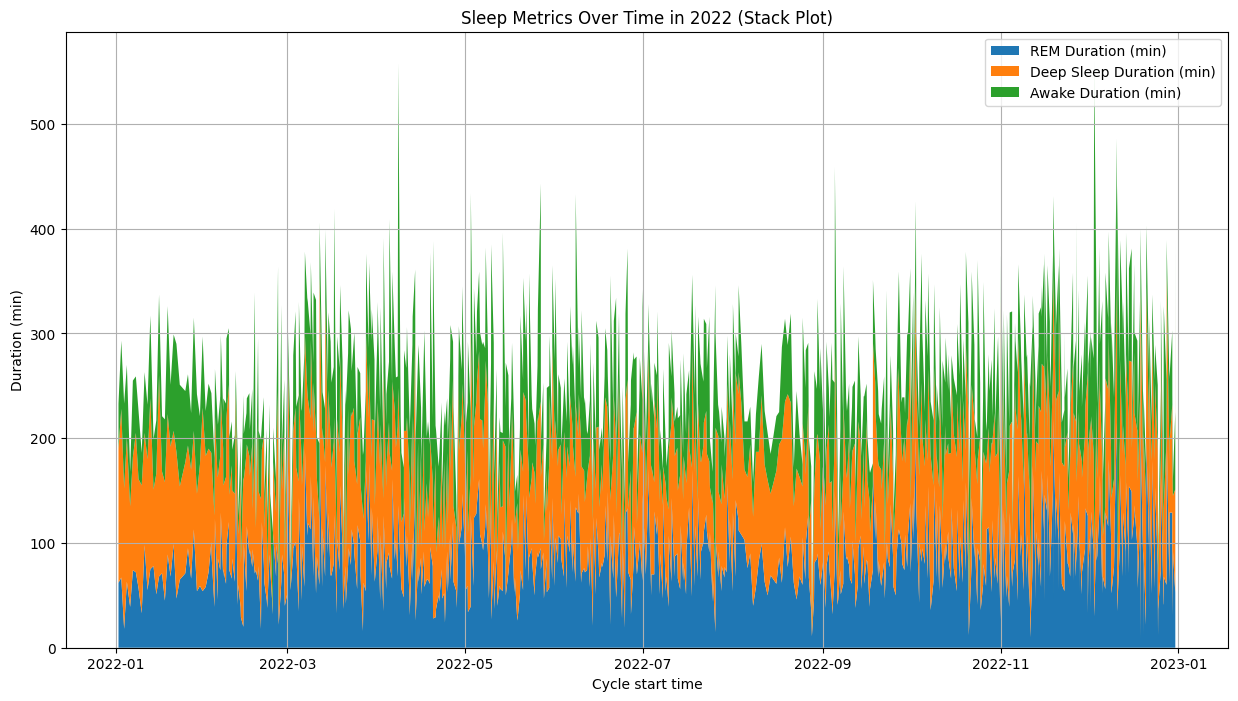

In [ ]:
# Assuming 'Cycle start time' is in datetime format
whoop_df['Cycle start time'] = pd.to_datetime(whoop_df['Cycle start time'])

# Filter DataFrame to include only data from the year 2022
whoop_df_2022 = whoop_df[(whoop_df['Cycle start time'] >= '2022-01-01') & (whoop_df['Cycle start time'] < '2023-01-01')]

# Sort DataFrame by 'Cycle start time' for a chronological line plot
whoop_df_2022 = whoop_df_2022.sort_values(by='Cycle start time')

# Create a stack plot for different sleep metrics over time in 2022
plt.figure(figsize=(15, 8))

plt.stackplot(whoop_df_2022['Cycle start time'],
              whoop_df_2022['REM duration (min)'],
              whoop_df_2022['Deep (SWS) duration (min)'],
              whoop_df_2022['Awake duration (min)'],
              labels=['REM Duration (min)', 'Deep Sleep Duration (min)', 'Awake Duration (min)'])

plt.title('Sleep Metrics Over Time in 2022 (Stack Plot)')
plt.xlabel('Cycle start time')
plt.ylabel('Duration (min)')
plt.legend()
plt.grid(True)
plt.show()

# Taking a Look at a Specific Month (Syllabus Week / Month)


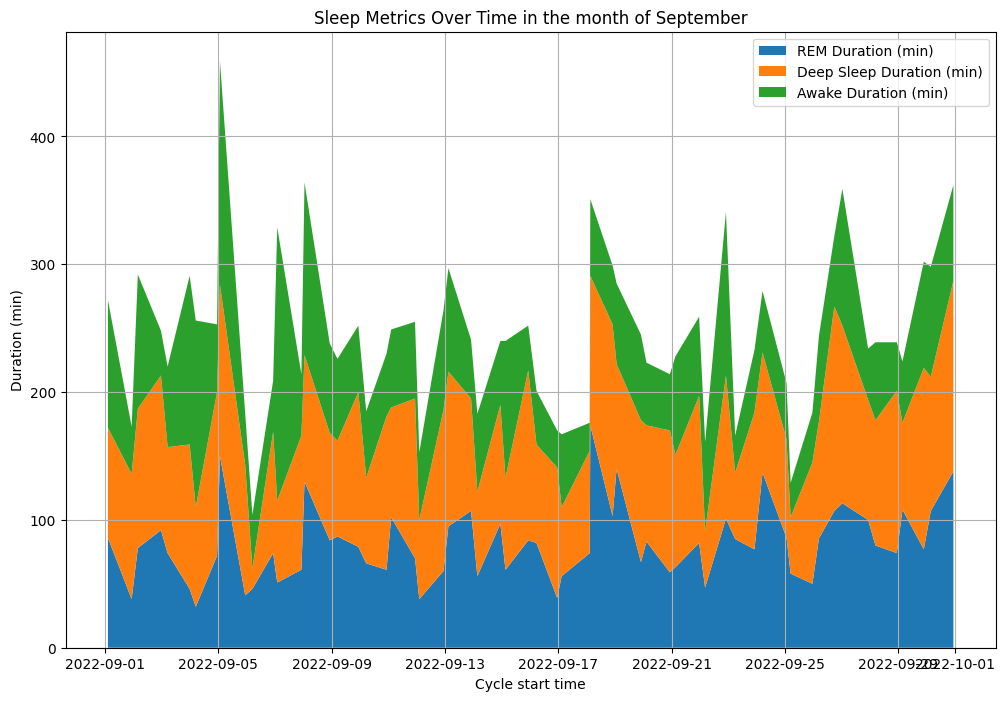

In [ ]:
# Assuming 'Cycle start time' is in datetime format
whoop_df['Cycle start time'] = pd.to_datetime(whoop_df['Cycle start time'])

# Filter DataFrame to include only data from the year 2022
whoop_df_2022 = whoop_df[(whoop_df['Cycle start time'] >= '2022-09-01') & (whoop_df['Cycle start time'] < '2022-10-01')]

# Sort DataFrame by 'Cycle start time' for a chronological line plot
whoop_df_2022 = whoop_df_2022.sort_values(by='Cycle start time')

# Create a stack plot for different sleep metrics over time in 2022
plt.figure(figsize=(12, 8))

plt.stackplot(whoop_df_2022['Cycle start time'],
              whoop_df_2022['REM duration (min)'],
              whoop_df_2022['Deep (SWS) duration (min)'],
              whoop_df_2022['Awake duration (min)'],
              labels=['REM Duration (min)', 'Deep Sleep Duration (min)', 'Awake Duration (min)'])

plt.title('Sleep Metrics Over Time in the month of September')
plt.xlabel('Cycle start time')
plt.ylabel('Duration (min)')
plt.legend()
plt.grid(True)
plt.show()

# How does Recovery differ from week day to weekend?
We chose the month of September, 2023 to analyze.
Looks like someone enjoys going out on weekends...

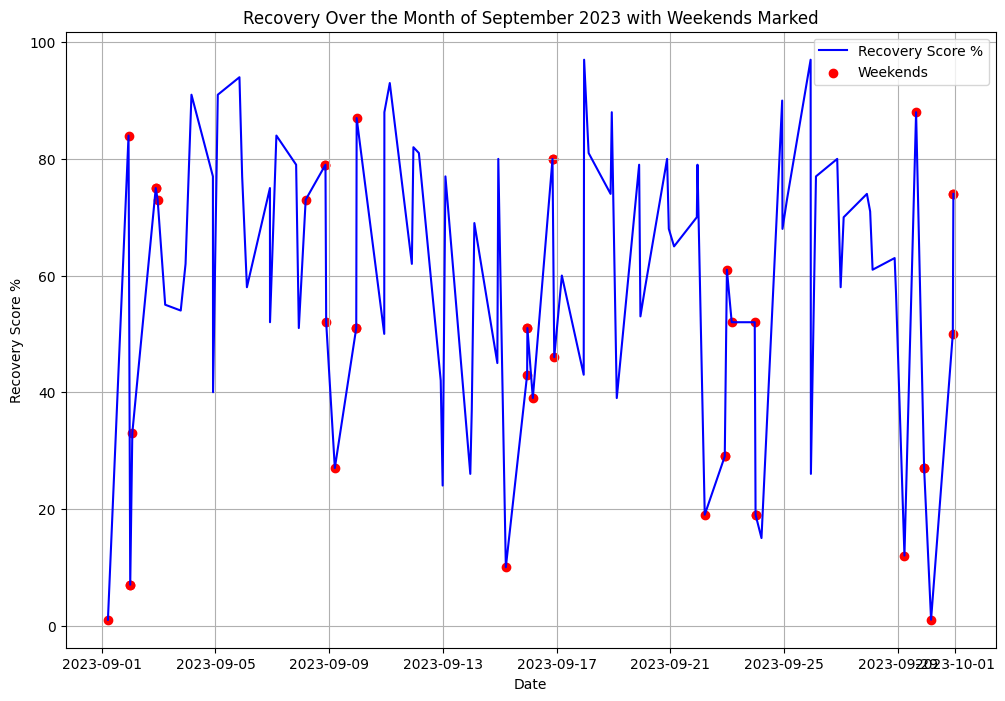

In [ ]:
# Assuming 'Cycle start time' is in datetime format
whoop_df['Cycle start time'] = pd.to_datetime(whoop_df['Cycle start time'])

# Filter DataFrame to include only data from September 2023
september_2023_data = whoop_df[(whoop_df['Cycle start time'].dt.year == 2023) & (whoop_df['Cycle start time'].dt.month == 9)]

# Sort DataFrame by 'Cycle start time' for a chronological line plot
september_2023_data = september_2023_data.sort_values(by='Cycle start time')

# Create a line plot for recovery over the month of September 2023
plt.figure(figsize=(12, 8))

# Plot the recovery scores
plt.plot(september_2023_data['Cycle start time'], september_2023_data['Recovery score %'], linestyle='-', color='blue', label='Recovery Score %')

# Identify and mark weekends with red dots
weekends = september_2023_data[september_2023_data['Cycle start time'].dt.day_name().isin(['Friday', 'Saturday'])]
plt.scatter(weekends['Cycle start time'], weekends['Recovery score %'], color='red', label='Weekends')

# Set labels and title
plt.title('Recovery Over the Month of September 2023 with Weekends Marked')
plt.xlabel('Date')
plt.ylabel('Recovery Score %')

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()

# Average Recovery Score by Day of the Week


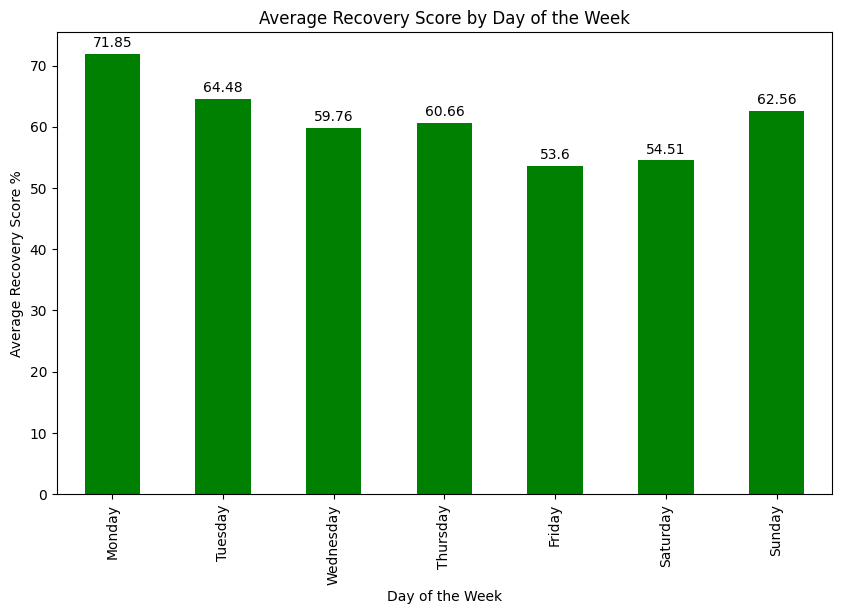

In [ ]:
# Assuming 'Cycle start time' and 'Recovery score %' columns exist in whoop_df
whoop_df['Cycle start time'] = pd.to_datetime(whoop_df['Cycle start time'])
whoop_df['Day of Week'] = whoop_df['Cycle start time'].dt.day_name()

# Group by day of the week and calculate the mean recovery score
average_recovery_by_day = whoop_df.groupby('Day of Week')['Recovery score %'].mean()

# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = average_recovery_by_day.loc[days_order].plot(kind='bar', color='green')
plt.title('Average Recovery Score by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Recovery Score %')

# Add a line across the top of each bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

plt.show()

# Analysing the Total Distribution of Recovery Scores
As well as an interesting observation of weekend excursions

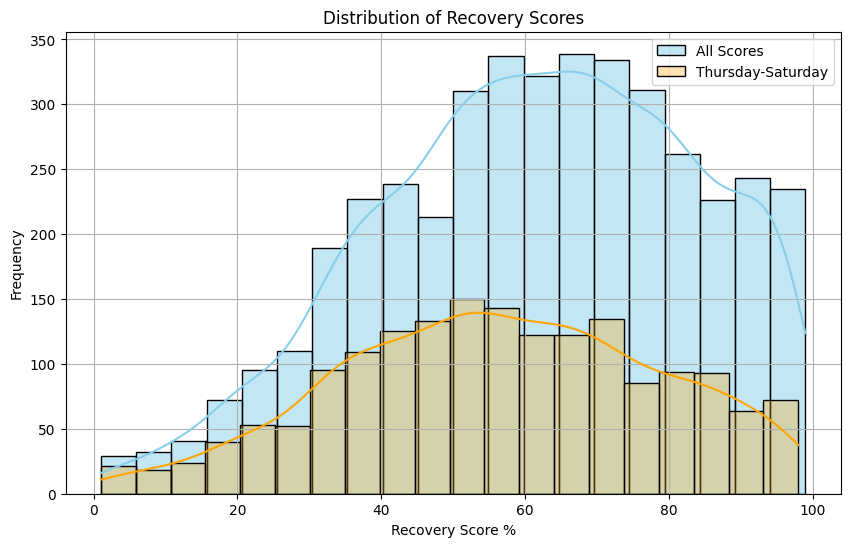

In [ ]:
# Assuming 'Cycle start time' and 'Recovery score %' columns exist in whoop_df
whoop_df['Cycle start time'] = pd.to_datetime(whoop_df['Cycle start time'])
whoop_df['Day of Week'] = whoop_df['Cycle start time'].dt.day_name()

# Filter recovery scores on weekends
weekend_scores = whoop_df.loc[whoop_df['Day of Week'].isin(['Thursday', 'Friday', 'Saturday']), 'Recovery score %'].dropna()

# Create a histogram with kernel density estimate
plt.figure(figsize=(10, 6))
ax = sns.histplot(whoop_df['Recovery score %'].dropna(), bins=20, kde=True, color='skyblue', edgecolor='black', label='All Scores')
sns.histplot(weekend_scores, bins=20, kde=True, color='orange', alpha=0.3, label='Thursday-Saturday')

plt.title('Distribution of Recovery Scores')
plt.xlabel('Recovery Score %')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

plt.show()

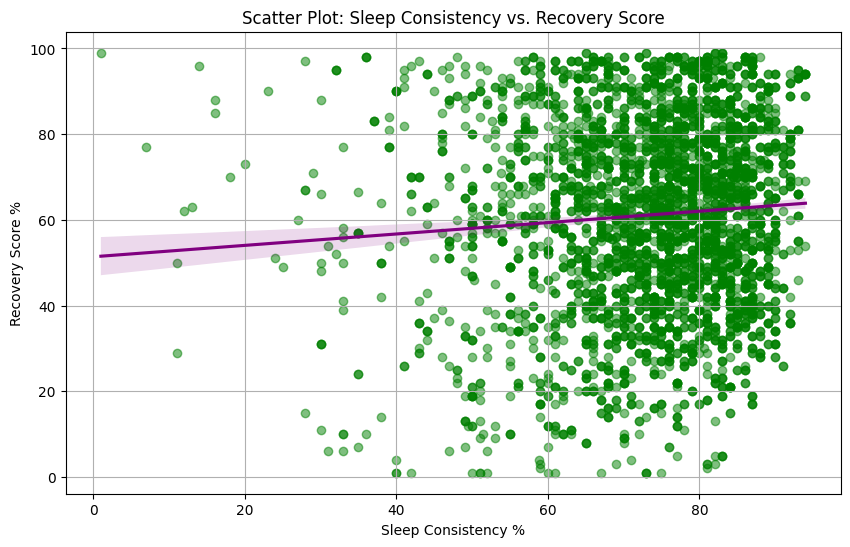

Correlation Coefficient: 0.07376984856289592


In [ ]:
# Drop rows with missing values in the relevant columns
sleep_recovery_data = whoop_df[['Sleep consistency %', 'Recovery score %']].dropna()

# Scatter plot with green color
plt.figure(figsize=(10, 6))
sns.regplot(x='Sleep consistency %', y='Recovery score %', data=sleep_recovery_data, scatter_kws={'alpha': 0.5, 'color': 'green'}, line_kws={'color': 'purple'})
plt.title('Scatter Plot: Sleep Consistency vs. Recovery Score')
plt.xlabel('Sleep Consistency %')
plt.ylabel('Recovery Score %')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = sleep_recovery_data['Sleep consistency %'].corr(sleep_recovery_data['Recovery score %'])
print(f'Correlation Coefficient: {correlation_coefficient}')


# In Depth View into Statistical Distribution of Heart Rate Variability

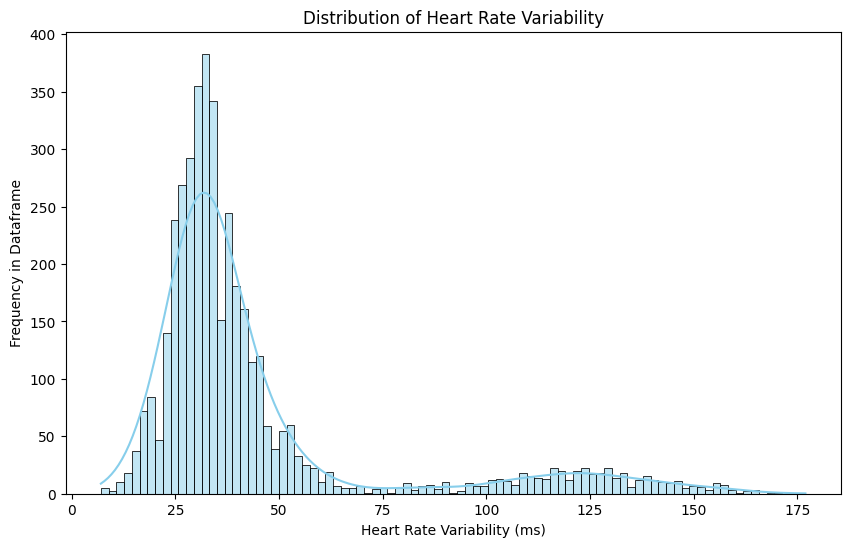

In [ ]:
# Drop rows with missing values in the relevant column
data = whoop_df.dropna(subset=['Heart rate variability (ms)'])

# Create a histogram and kernel density plot
plt.figure(figsize=(10, 6))
sns.histplot(data['Heart rate variability (ms)'], kde=True, color='skyblue')
plt.title('Distribution of Heart Rate Variability')
plt.xlabel('Heart Rate Variability (ms)')
plt.ylabel('Frequency in Dataframe')
plt.show()

# Graph is a positive skew

# Analysis of Heart Rate Variability based on Skin Temperature


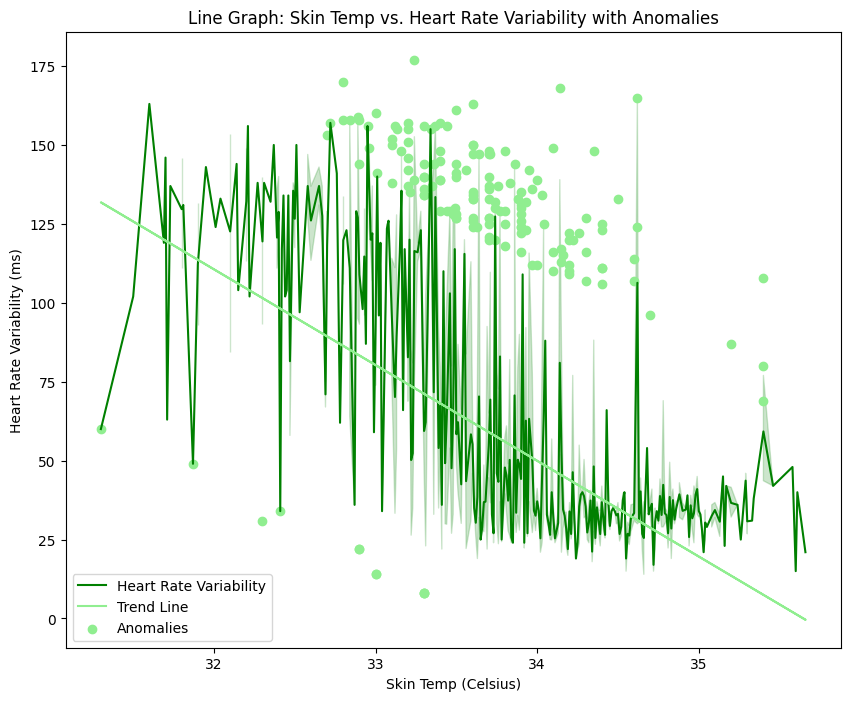

In [ ]:
# Drop rows with missing values in relevant columns
data = whoop_df.dropna(subset=['Skin temp (celsius)', 'Heart rate variability (ms)'])

# Model the relationship using linear regression
X = sm.add_constant(data['Skin temp (celsius)'])
y = data['Heart rate variability (ms)']

model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = y - model.predict(X)

# Set the threshold for anomalies in residuals (e.g., 2 standard deviations)
threshold_std_residuals = 2

# Identify anomalies in residuals
anomalies_residuals = data[abs(residuals) > threshold_std_residuals * residuals.std()]

# Create the line graph with regression line
plt.figure(figsize=(10, 8))
sns.lineplot(data=data, x='Skin temp (celsius)', y='Heart rate variability (ms)', label='Heart Rate Variability', color='green')
plt.plot(data['Skin temp (celsius)'], model.predict(X), color='lightgreen', label='Trend Line')

# Highlight anomalies in residuals
if not anomalies_residuals.empty:
    plt.scatter(anomalies_residuals['Skin temp (celsius)'], anomalies_residuals['Heart rate variability (ms)'], color='lightgreen', label='Anomalies')

plt.title('Line Graph: Skin Temp vs. Heart Rate Variability with Anomalies')
plt.xlabel('Skin Temp (Celsius)')
plt.ylabel('Heart Rate Variability (ms)')
plt.legend()
plt.show()

# Analysis of Heart Rate Metrics
Relationship between Resting Heart Rate and Heart Rate Variability

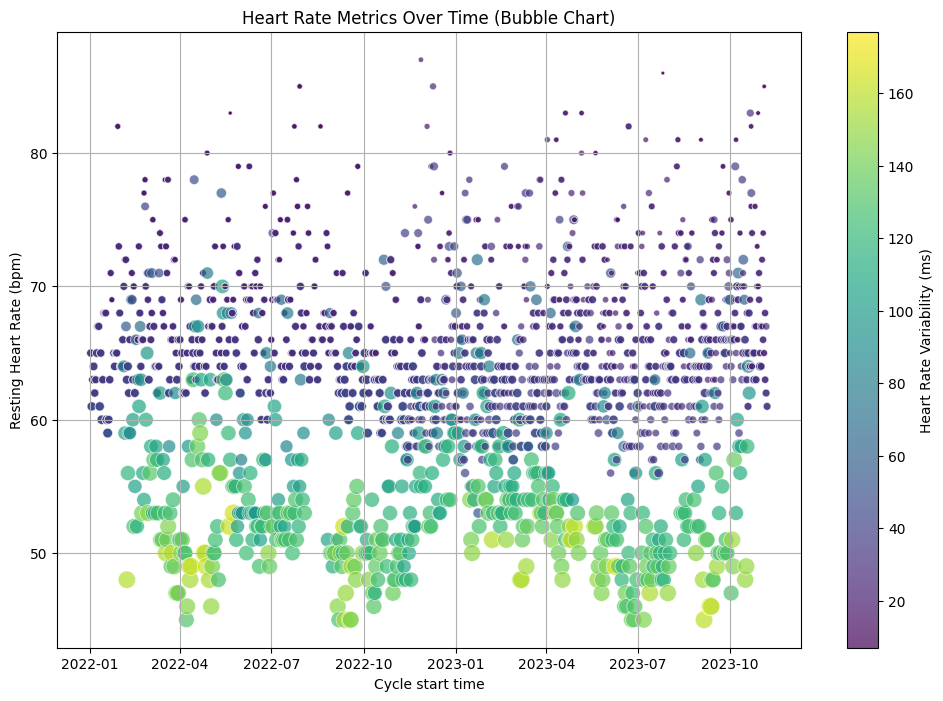

In [ ]:
# Assuming 'Cycle start time' is in datetime format
whoop_df['Cycle start time'] = pd.to_datetime(whoop_df['Cycle start time'])

# Filter data for the year 2022 and onwards
whoop_df = whoop_df[whoop_df['Cycle start time'].dt.year >= 2022]

# Sort DataFrame by 'Cycle start time' for a chronological bubble plot
whoop_df = whoop_df.sort_values(by='Cycle start time')

# Create a bubble chart for heart rate metrics over time
plt.figure(figsize=(12, 8))

plt.scatter(whoop_df['Cycle start time'],
            whoop_df['Resting heart rate (bpm)'],
            s=whoop_df['Heart rate variability (ms)'],  # Map size to frequency of heart rate variability
            c=whoop_df['Heart rate variability (ms)'],  # Map color to heart rate variability
            alpha=0.7,
            cmap='viridis',
            edgecolors='w',
            linewidth=0.5)

plt.title('Heart Rate Metrics Over Time (Bubble Chart)')
plt.xlabel('Cycle start time')
plt.ylabel('Resting Heart Rate (bpm)')
plt.colorbar(label='Heart Rate Variability (ms)')  # Add colorbar to indicate bubble sizes
plt.grid(True)
plt.show()

# Conclusion
Through analyzing the data we were able to find significant trends by using differing techniques. The most significant of these was the September recovery week to week. It was clear that on the weekends recovery was significantly lower than the recovery on the weekdays. This was most likely due to the people in the dataset had higher levels of drinking that usually take place. Another takeaway from the data is that a higher skin temperature correlated with lower HRV (heart rate variability) causing a lower recovery. Another conclusion we came to was that a higher skin temperature when sleeping lead to a lower amount of time in REM sleep. Also higher blood oxygen levels lead to a longer amount of time spent in REM sleep. Using these findings one can see how to get the best recovery and sleep which was lowering drinking, lowering the temperature of your room and that more sleep usually leads to the largest increase in light sleep over over types of sleep.

